# MyCoast NY Exploratory Data Analysis 
Author: Mark Bauer  

MyCoast New York: https://mycoast.org/ny  
Download Data: https://mycoast.org/download-data

In [1]:
# importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import IPython

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,seaborn

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2
seaborn   : 0.11.2



In [3]:
# list files in directory
%ls

MyCoast export 2024-07-05 1-1200.csv
MyCoast export 2024-07-05 1201-1301.csv
README.md
analysis.ipynb
figures/


# Read-In Data

In [4]:
# read in both chunked files
sheet_one = pd.read_csv('MyCoast export 2024-07-05 1-1200.csv')
sheet_two = pd.read_csv('MyCoast export 2024-07-05 1201-1301.csv')

print('file one shape: {}'.format(sheet_one.shape))
print('file two shape: {}'.format(sheet_two.shape))

file one shape: (1200, 60)
file two shape: (101, 51)


# Preview Data

In [5]:
# preview data
sheet_one.head()

,ID #,reportType,photo_date,photo_time,from_device,AuthorName,AuthorEmail,URL,images,location_longitude,...,response_other,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172342,Storm,2024-06-06,12:36 pm,Android 14,NaN,NaN,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,164801,Storm,2024-05-10,4:56 pm,Android 14,NaN,NaN,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# summary of data
sheet_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1200 non-null   int64  
 1   reportType                       1200 non-null   object 
 2   photo_date                       1200 non-null   object 
 3   photo_time                       1200 non-null   object 
 4   from_device                      1073 non-null   object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              1200 non-null   object 
 8   images                           1165 non-null   object 
 9   location_longitude               1200 non-null   float64
 10  location_latitude                1200 non-null   float64
 11  geo_administrative_area_level_1  1200 non-null   object 
 12  geo_administrative_a

In [7]:
# summary of sheet two
sheet_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             101 non-null    int64  
 1   reportType                       101 non-null    object 
 2   photo_date                       101 non-null    object 
 3   photo_time                       101 non-null    object 
 4   from_device                      94 non-null     object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              101 non-null    object 
 8   images                           101 non-null    object 
 9   location_longitude               101 non-null    float64
 10  location_latitude                101 non-null    float64
 11  geo_administrative_area_level_1  101 non-null    object 
 12  geo_administrative_are

# Clean Columns

In [8]:
# retrieve only columns in sheet 1 and sheet 2
cols = sheet_one.columns[sheet_one.columns.isin(sheet_two.columns)]

cols

Index(['ID #', 'reportType', 'photo_date', 'photo_time', 'from_device',
       'AuthorName', 'AuthorEmail', 'URL', 'images', 'location_longitude',
       'location_latitude', 'geo_administrative_area_level_1',
       'geo_administrative_area_level_2', 'geo_locality', 'geo_neighborhood',
       'geo_route', 'weather_temperature', 'weather_windSpeed',
       'weather_windBearing', 'weather_calc_24hr_precip', 'TideDataObserved',
       'TideDataPredicted', 'MyCoastAI-description', 'report_created',
       'alternate-location-name', 'guessCause', 'cause-other', 'whatFlooded',
       'flooded-other', 'guessDepth', 'post_comment', 'anonymous',
       'report_icon', 'storm_damage', 'road_damage', 'road_other',
       'road_comments', 'marinas_damage', 'float_number', 'boat_number',
       'marinas_comments', 'buildings_damage', 'buildings_street',
       'buildings_comments', 'hazmat_damage damage-cat', 'hazmat_comments',
       'beach_damage', 'beach_comments', 'structure_damage',
       'st

In [9]:
# columns that are in sheet one but not in sheet two
cols = sheet_two.columns[~sheet_two.columns.isin(sheet_one.columns)]

cols

Index([], dtype='object')

In [10]:
# columns that are in sheet two but not in sheet one
cols = sheet_one.columns[~sheet_one.columns.isin(sheet_two.columns)]

cols

Index(['road_damage_detail', 'marinas_damage_detail', 'beach_damage_detail',
       'buildings_damage_detail', 'hazmat_damage_detail', 'response_damage',
       'amazonS3_cache', 'place_name', 'structure_damage_detail'],
      dtype='object')

In [11]:
# concatenate them together
df = pd.concat([sheet_one, sheet_two], axis=0, ignore_index=True)

print(df.shape)
df.head()

(1301, 60)


,ID #,reportType,photo_date,photo_time,from_device,AuthorName,AuthorEmail,URL,images,location_longitude,...,response_other,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,NaN,NaN,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172342,Storm,2024-06-06,12:36 pm,Android 14,NaN,NaN,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,164801,Storm,2024-05-10,4:56 pm,Android 14,NaN,NaN,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1301 non-null   int64  
 1   reportType                       1301 non-null   object 
 2   photo_date                       1301 non-null   object 
 3   photo_time                       1301 non-null   object 
 4   from_device                      1167 non-null   object 
 5   AuthorName                       0 non-null      float64
 6   AuthorEmail                      0 non-null      float64
 7   URL                              1301 non-null   object 
 8   images                           1266 non-null   object 
 9   location_longitude               1301 non-null   float64
 10  location_latitude                1301 non-null   float64
 11  geo_administrative_area_level_1  1301 non-null   object 
 12  geo_administrative_a

In [13]:
# percent null for each column
(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 .div(df.shape[0])
 .mul(100)
 .round(2)
)

hazmat_comments                    100.00
road_other                         100.00
AuthorName                         100.00
AuthorEmail                        100.00
structures_comments                100.00
marinas_damage_detail               99.92
place_name                          99.92
marinas_comments                    99.92
buildings_comments                  99.92
response_other                      99.85
structure_damage_detail             99.85
amazonS3_cache                      99.85
hazmat_damage_detail                99.85
beach_comments                      99.77
buildings_street                    99.54
buildings_damage_detail             99.39
beach_damage_detail                 99.39
road_comments                       99.31
cause-other                         98.92
response_damage                     98.77
road_damage_detail                  98.62
flooded-other                       97.62
boat_number                         92.54
float_number                      

In [14]:
# drop columns that are all null values

# keep columns with at least one presense of not null
cols = df.columns[df.notnull().any()]
df = df.loc[:, cols]

print(df.shape)
df.head()

(1301, 55)


,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,response_other,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,40.703412,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,40.703760,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,40.704205,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172342,Storm,2024-06-06,12:36 pm,Android 14,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,40.554243,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,164801,Storm,2024-05-10,4:56 pm,Android 14,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,40.554581,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID #                             1301 non-null   int64  
 1   reportType                       1301 non-null   object 
 2   photo_date                       1301 non-null   object 
 3   photo_time                       1301 non-null   object 
 4   from_device                      1167 non-null   object 
 5   URL                              1301 non-null   object 
 6   images                           1266 non-null   object 
 7   location_longitude               1301 non-null   float64
 8   location_latitude                1301 non-null   float64
 9   geo_administrative_area_level_1  1301 non-null   object 
 10  geo_administrative_area_level_2  1280 non-null   object 
 11  geo_locality                     414 non-null    object 
 12  geo_neighborhood    

In [16]:
# briefly preview structure columns
df.loc[df['structure_damage'].notnull(), 'structure_damage'].value_counts()

No Impacts        98
Report Impacts     2
Name: structure_damage, dtype: int64

In [17]:
# briefly preview structure columns
df.loc[df['structure_damage_detail'].notnull(), 'structure_damage_detail'].value_counts()

Wave splashover    2
Name: structure_damage_detail, dtype: int64

# Capturing Records Only in NYC

In [18]:
# read in boros shapes
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'
nyc_boros = gpd.read_file(path)

nyc_boros

,boro_code,boro_name,shape_area,shape_leng,geometry
0,3.0,Brooklyn,1.934143e+09,728150.705111,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5.0,Staten Island,1.623619e+09,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1.0,Manhattan,6.366456e+08,360056.730857,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2.0,Bronx,1.187175e+09,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4.0,Queens,3.041418e+09,888197.010944,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [19]:
# Examine county column, geo_administrative_area_level_2
df.iloc[:, 7:].head()

,location_longitude,location_latitude,geo_administrative_area_level_1,geo_administrative_area_level_2,geo_locality,geo_neighborhood,geo_route,weather_temperature,weather_windSpeed,weather_windBearing,...,response_other,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail
0,-73.926688,40.703412,NY,Kings County,NaN,Bushwick,Knickerbocker Ave,78.0,8.1,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.927159,40.703760,NY,Kings County,NaN,Bushwick,Knickerbocker Ave,77.4,3.5,326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.927829,40.704205,NY,Kings County,NaN,Bushwick,Knickerbocker Ave,77.2,3.2,297.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-74.115892,40.554243,NY,Richmond County,NaN,Oakwood,Fox Beach Ave,74.9,10.3,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-74.116272,40.554581,NY,Richmond County,NaN,Oakwood,Fox Ln,52.1,17.2,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# examine distribution of records per county
df['geo_administrative_area_level_2'].value_counts(dropna=False)

Queens County         683
Suffolk County        169
Bronx County          135
Dutchess County        66
Ulster County          55
Kings County           43
Westchester County     28
Richmond County        22
NaN                    21
Nassau County          20
Albany County          17
Onondaga County        10
Greene County           7
Putnam County           6
New York County         3
Cortland County         3
Delaware County         2
Rockland County         2
Warren County           1
Monroe County           1
Essex County            1
Orange County           1
Columbia County         1
Oswego County           1
Erie County             1
Tompkins County         1
Jefferson County        1
Name: geo_administrative_area_level_2, dtype: int64

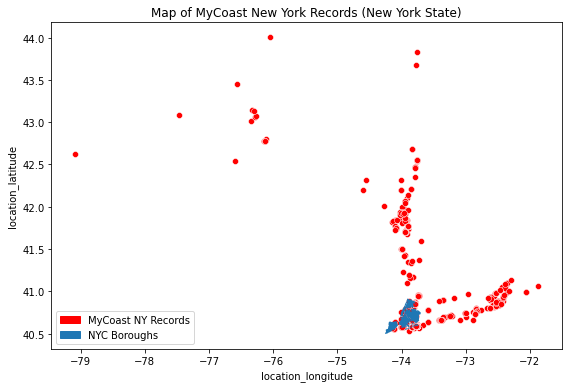

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
    label='Records'
)

nyc_boros.plot(ax=ax, zorder=1, label='Borough')

blue_patch = mpatches.Patch(color='red', label='MyCoast NY Records')
orange_patch = mpatches.Patch(color='C0', label='NYC Boroughs')
plt.legend(handles=[blue_patch, orange_patch], loc=3)

plt.title('Map of MyCoast New York Records (New York State)')

plt.tight_layout()

In [22]:
# retrieve only records in NYC
counties_nyc = [
    'Queens County',
    'Bronx County',
    'New York County',
    'Richmond County',
    'Kings County'
]

df = (
    df
    .loc[df['geo_administrative_area_level_2'].isin(counties_nyc)]
    .reset_index(drop=True)
)

print(df.shape)
df.head()

(886, 55)


,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,response_other,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,40.703412,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,40.703760,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,40.704205,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172342,Storm,2024-06-06,12:36 pm,Android 14,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,40.554243,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,164801,Storm,2024-05-10,4:56 pm,Android 14,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,40.554581,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# examine distribution of records per county
df['geo_administrative_area_level_2'].value_counts(dropna=False)

Queens County      683
Bronx County       135
Kings County        43
Richmond County     22
New York County      3
Name: geo_administrative_area_level_2, dtype: int64

# Maps

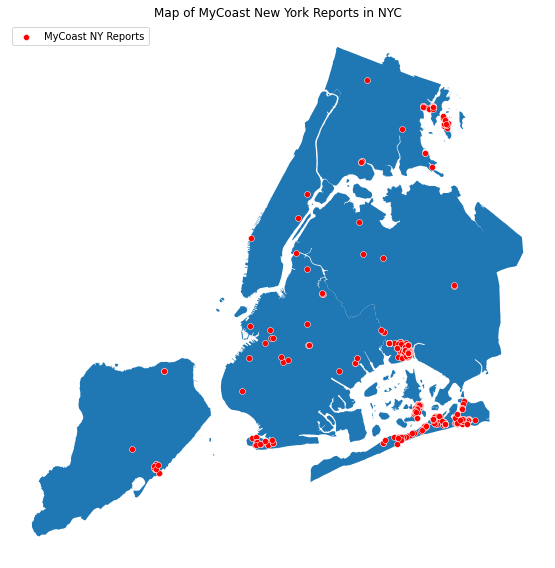

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
    label='MyCoast NY Reports'
)

nyc_boros.plot(ax=ax, zorder=0)

plt.title('Map of MyCoast New York Reports in NYC')
plt.legend(loc=2)
plt.axis('off')

plt.tight_layout()
plt.savefig('figures/reports-nyc.png', bbox_inches='tight', dpi=250)

In [25]:
# reading in NTA shape
url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2020/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_gdf = gpd.read_file(url)

# convert crs to 2263
nta_gdf = nta_gdf.to_crs(2263)
nta_gdf['ntaname_boro'] = nta_gdf['NTAName'] + ', ' + nta_gdf['BoroName']

print('shape of data:', nta_gdf.shape)
nta_gdf.head()

shape of data: (262, 14)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,geometry,ntaname_boro
0,1,3,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),3.532114e+07,28912.525557,"POLYGON ((1003059.576 204575.253, 1002990.946 ...","Greenpoint, Brooklyn"
1,2,3,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),2.885424e+07,28097.874158,"POLYGON ((994848.573 203502.478, 994910.655 20...","Williamsburg, Brooklyn"
2,3,3,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),1.520896e+07,18250.280262,"POLYGON ((998046.790 196306.529, 998157.482 19...","South Williamsburg, Brooklyn"
3,4,3,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),5.226628e+07,43184.732287,"POLYGON ((1005302.088 199458.952, 1005307.383 ...","East Williamsburg, Brooklyn"
4,5,3,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,9.982387e+06,14312.482065,"POLYGON ((986367.302 190552.408, 985813.400 19...","Brooklyn Heights, Brooklyn"


In [26]:
# create new columns in nta geodataframe
nta_gdf['Shape__Area'] = nta_gdf['Shape__Area'].astype(float)
nta_gdf['shape_area_sq_mi'] = nta_gdf['Shape__Area'] / 27878400

In [27]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(
        df['location_longitude'],
        df['location_latitude'],
        crs=4326)
)

gdf = gdf.to_crs(2263)

gdf.head()

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,40.703412,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1004576.924 195556.999)
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,40.703760,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1004446.257 195683.660)
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,40.704205,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1004260.394 195845.972)
3,172342,Storm,2024-06-06,12:36 pm,Android 14,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,40.554243,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (952045.138 141223.532)
4,164801,Storm,2024-05-10,4:56 pm,Android 14,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,40.554581,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (951939.677 141346.995)


In [28]:
# spatial join nta information to points
gdf_merged = gpd.sjoin(
    gdf,
    nta_gdf,
    how="left",
    predicate='intersects'
)

print(gdf_merged.shape)
gdf_merged.head()

(886, 71)


,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,ntaname_boro,shape_area_sq_mi
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,40.703412,NY,...,BK0401,Bushwick (West),Bshwck_W,0,BK04,BK04 Bushwick (CD 4 Equivalent),2.313550e+07,23685.207028,"Bushwick (West), Brooklyn",0.829872
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,40.703760,NY,...,BK0401,Bushwick (West),Bshwck_W,0,BK04,BK04 Bushwick (CD 4 Equivalent),2.313550e+07,23685.207028,"Bushwick (West), Brooklyn",0.829872
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,40.704205,NY,...,BK0401,Bushwick (West),Bshwck_W,0,BK04,BK04 Bushwick (CD 4 Equivalent),2.313550e+07,23685.207028,"Bushwick (West), Brooklyn",0.829872
3,172342,Storm,2024-06-06,12:36 pm,Android 14,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,40.554243,NY,...,SI0301,Oakwood-Richmondtown,Okwd_Rmtwn,0,SI03,SI03 South Shore (CD 3 Approximation),5.593747e+07,44192.674341,"Oakwood-Richmondtown, Staten Island",2.006481
4,164801,Storm,2024-05-10,4:56 pm,Android 14,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,40.554581,NY,...,SI0301,Oakwood-Richmondtown,Okwd_Rmtwn,0,SI03,SI03 South Shore (CD 3 Approximation),5.593747e+07,44192.674341,"Oakwood-Richmondtown, Staten Island",2.006481


In [29]:
gdf_merged = (
    gdf_merged.groupby(by='ntaname_boro')['ID #']
    .count()
    .reset_index()
    .rename(columns={'ID #':'count'})
)

gdf_merged.head()

,ntaname_boro,count
0,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,170
1,"Bushwick (West), Brooklyn",3
2,"Canarsie, Brooklyn",3
3,"Carroll Gardens-Cobble Hill-Gowanus-Red Hook, ...",2
4,"Chelsea-Hudson Yards, Manhattan",1


In [30]:
nta_gdf_merged = nta_gdf.merge(gdf_merged, on='ntaname_boro')

nta_gdf_merged.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape__Area,Shape__Length,geometry,ntaname_boro,shape_area_sq_mi,count
0,1,3,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),3.532114e+07,28912.525557,"POLYGON ((1003059.576 204575.253, 1002990.946 ...","Greenpoint, Brooklyn",1.266972,2
1,12,3,Brooklyn,047,BK0401,Bushwick (West),Bshwck_W,0,BK04,BK04 Bushwick (CD 4 Equivalent),2.313550e+07,23685.207028,"POLYGON ((1008809.916 194862.586, 1008492.597 ...","Bushwick (West), Brooklyn",0.829872,3
2,18,3,Brooklyn,047,BK0504,Spring Creek-Starrett City,SpCrk_StrC,0,BK05,BK05 East New York-Cypress Hills (CD 5 Approxi...,2.708635e+07,32929.450862,"MULTIPOLYGON (((1015250.730 174917.766, 101524...","Spring Creek-Starrett City, Brooklyn",0.971589,1
3,19,3,Brooklyn,047,BK0505,East New York-City Line,ENY_CtyLn,0,BK05,BK05 East New York-Cypress Hills (CD 5 Approxi...,3.152910e+07,29722.222620,"POLYGON ((1022151.943 186815.338, 1022163.085 ...","East New York-City Line, Brooklyn",1.130951,1
4,21,3,Brooklyn,047,BK0601,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,CrrllGrdns,0,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,6.081183e+07,67164.033379,"POLYGON ((986367.302 190552.408, 986295.438 19...","Carroll Gardens-Cobble Hill-Gowanus-Red Hook, ...",2.181324,2


In [31]:
nta_gdf_merged['count_sq_mi'] = nta_gdf_merged['count'] / nta_gdf_merged['shape_area_sq_mi']

nta_gdf_merged.loc[:, ['count', 'count_sq_mi']].describe()

,count,count_sq_mi
count,35.000000,35.000000
mean,25.171429,13.102336
std,64.966274,32.950022
min,1.000000,0.653196
25%,1.000000,1.067996
50%,2.000000,1.578567
75%,4.500000,4.209909
max,339.000000,179.655904


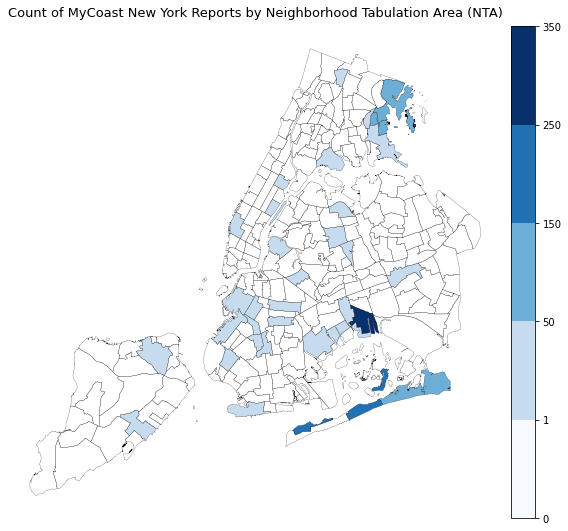

In [32]:
# counts are not normalized by area
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, 1, 50, 150, 250, 350], cmap.N)

nta_gdf_merged.plot(
    column='count', 
    cmap=cmap,
    ax=ax, 
    legend=True,
    cax=cax,
    norm=norm,
)

nta_gdf.plot(
    facecolor="none", 
    edgecolor="black", 
    linewidth=.2,
    ax=ax,
    zorder=1
)

title = 'Count of MyCoast New York Reports by Neighborhood Tabulation Area (NTA)'
ax.set_title(title, fontsize=13, pad=10)

ax.axis('off')
plt.tight_layout()

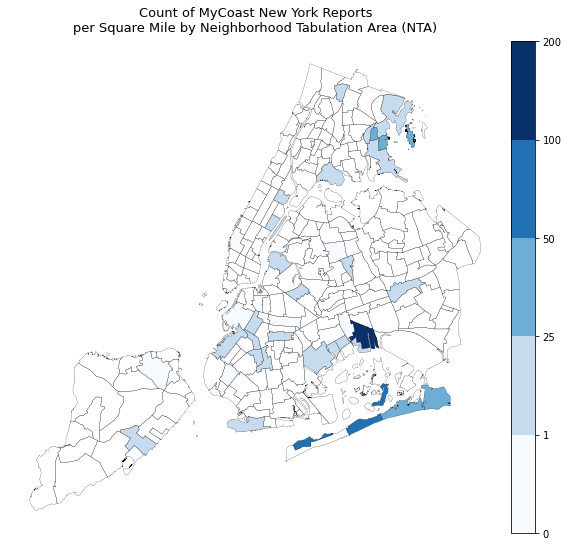

In [33]:
# counts are normalized by area
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([0, 1, 25, 50, 100, 200], cmap.N)

nta_gdf_merged.plot(
    column='count_sq_mi', 
    cmap=cmap,
    ax=ax, 
    legend=True,
    cax=cax,
    norm=norm,
)

nta_gdf.plot(
    facecolor="none", 
    edgecolor="black", 
    linewidth=.2,
    ax=ax,
    zorder=1
)

title = 'Count of MyCoast New York Reports\nper Square Mile by Neighborhood Tabulation Area (NTA)'
ax.set_title(title, fontsize=13, pad=10)

ax.axis('off')
plt.tight_layout()
plt.savefig('figures/choropleth-map.png', bbox_inches='tight', dpi=250)

# Additional Exploratory Data Analysis

## Examine source device

In [34]:
df.head()

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
0,172408,Flood Watch,2024-06-06,7:46 pm,iOS 17.5.1,https://mycoast.org/reports/172408,https://report-images.nyc3.digitaloceanspaces....,-73.926688,40.703412,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.92669 40.70341)
1,172405,Flood Watch,2024-06-06,3:03 pm,iOS 17.5.1,https://mycoast.org/reports/172405,https://report-images.nyc3.digitaloceanspaces....,-73.927159,40.703760,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.92716 40.70376)
2,172402,Flood Watch,2024-06-06,3:02 pm,iOS 17.5.1,https://mycoast.org/reports/172402,https://report-images.nyc3.digitaloceanspaces....,-73.927829,40.704205,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.92783 40.70421)
3,172342,Storm,2024-06-06,12:36 pm,Android 14,https://mycoast.org/reports/172342,https://report-images.nyc3.digitaloceanspaces....,-74.115892,40.554243,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.11589 40.55424)
4,164801,Storm,2024-05-10,4:56 pm,Android 14,https://mycoast.org/reports/164801,https://report-images.nyc3.digitaloceanspaces....,-74.116272,40.554581,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.11627 40.55458)


In [35]:
# distribution of records by device
df['from_device'].value_counts()

Lingyu import-0531    691
Android 14             39
iOS 17.3.1             15
iOS 17.4.1             14
iOS 17.2.1             11
Android 13             10
iOS 15.8.2             10
iOS 16.1.1              9
iOS 16.3.1              7
iOS 15.8                6
iOS 17.1.1              4
iOS 15.8.1              4
iOS 16.1.2              3
iOS 17.5.1              3
iOS 17.4                3
Android 10              2
iOS 16.2                2
iOS 15.6.1              2
iOS 17.1.2              1
iOS 16.6.1              1
Android 11              1
iOS 16.4.1              1
Android 12              1
Android 5.1             1
iOS 14.8                1
Name: from_device, dtype: int64

In [36]:
# distribution of records by report type
df['reportType'].value_counts()

Flood Watch    858
Storm           28
Name: reportType, dtype: int64

In [37]:
# distribution of records by photo date
df['photo_date'].value_counts().head(10)

2022-12-23    35
2024-01-13    28
2019-10-10    27
2018-10-27    25
2021-10-09    23
2019-09-29    22
2020-05-07    21
2020-04-09    21
2019-10-11    20
2019-10-29    20
Name: photo_date, dtype: int64

In [38]:
# distribution of records by photo time
df['photo_time'].value_counts().head(10)

9:30 am     11
10:00 am    10
9:45 am      8
11:00 am     7
10:10 am     7
9:15 am      7
9:00 pm      7
10:15 am     6
12:00 pm     5
9:55 am      5
Name: photo_time, dtype: int64

In [39]:
# distribution of records by recorded neighborhood
df['geo_neighborhood'].value_counts()

Jamaica             195
Far Rockaway        183
Howard Beach        132
Broad Channel        92
Orchard Beach Rd     58
City Island          56
Arverne              24
Oakwood              19
Old Howard Beach     18
Coney Island         17
Rockaway Park        13
Edgemere             10
Hunts Point           6
City Island Rd        4
Rockaway Beach        4
Little Caribbean      3
East Bronx            3
Canarsie              3
Bushwick              3
Sunset Park           2
Randall Manor         2
Seagate               2
Park Slope            2
Greenpoint            2
E 104th St            1
12th Ave              1
Starrett City         1
E 16th Rd             1
Park Dr               1
Flatbush              1
Jerome Ave            1
The Hole              1
E 74th St             1
Pelham Bay            1
Gowanus               1
Richmond              1
East Elmhurst         1
Dyker Heights         1
Windsor Terrace       1
Rego Park             1
Elmhurst              1
Kensington      

In [40]:
# distribution of records by recorded street
df['geo_route'].value_counts().head(10)

Orchard Beach Rd    58
E 6th Rd            56
Davenport Ct        49
160th Ave           42
164th Rd            30
164th Ave           30
Minnieford Ave      22
Cross Bay Blvd      22
Bayview Ave         20
Russell St          20
Name: geo_route, dtype: int64

In [41]:
# distribution of records by recorded cause
df['guessCause'].value_counts()

Overland flooding (Nearby waterbody)              401
Rainfall (Water pooling from direct rainfall)     114
Storm drain (Water pooling near a storm drain)    106
Unsure                                             31
Other                                               8
Broken pipes/water main break                       1
Name: guessCause, dtype: int64

In [42]:
# max values of wind speed
df['weather_windSpeed'].sort_values(ascending=False).head(10)

421    37.4
10     36.9
95     35.6
96     33.3
422    32.7
190    31.2
66     31.1
423    30.8
424    30.8
188    30.6
Name: weather_windSpeed, dtype: float64

In [43]:
# max values of 24h precipitation
df['weather_calc_24hr_precip'].sort_values(ascending=False).head(10)

135    6.880
285    4.103
756    3.390
296    3.092
145    2.864
44     2.763
591    2.669
491    2.504
838    2.307
836    2.306
Name: weather_calc_24hr_precip, dtype: float64

In [44]:
# distribution of records by recorded depth
df['guessDepth'].value_counts()

6.0     77
4.0     58
3.0     48
0.0     48
5.0     47
8.0     43
2.0     41
10.0    24
12.0    20
7.0     18
16.0    17
1.0     16
18.0    11
15.0     9
24.0     8
20.0     8
9.0      6
36.0     2
11.0     2
5.5      2
40.0     2
55.0     1
17.0     1
19.0     1
30.0     1
66.0     1
14.0     1
34.0     1
42.0     1
13.0     1
Name: guessDepth, dtype: int64

Need to clean up the depth values to numeric.

In [45]:
# max depths
(pd
 .to_numeric(df['guessDepth'], errors='coerce')
 .sort_values(ascending=False)
 .head(10)
)

283    66.0
284    55.0
131    42.0
180    40.0
181    40.0
130    36.0
285    36.0
132    34.0
109    30.0
394    24.0
Name: guessDepth, dtype: float64

In [46]:
# distribution of records by descriptions
df['MyCoastAI-description'].value_counts().head(8)

a flooded street with cars parked on the side    4
a puddle of water on a street                    3
a road with water on the side                    2
a street with cars parked on the side            2
a wet street at night                            2
a body of water with houses along it             2
a wet street with cars parked on the side        2
a road with snow on the side                     2
Name: MyCoastAI-description, dtype: int64

In [47]:
# distribution of records by what flooded
df['whatFlooded'].value_counts()

Roads/streets       755
Lawns/vegetation     27
Sidewalks             9
Other                 5
Parking lots          3
Structures            1
Name: whatFlooded, dtype: int64

# Examine Photos of Highest Guessed Depth Locations

In [48]:
# Top 10 Guessed Depths

cols = [
    'ID #', 'reportType', 'photo_date', 'photo_time', 'from_device', 'URL',
    'images', 'location_longitude', 'location_latitude', 'report_created', 'guessCause','guessDepth'
]

(df
 .assign(guessDepth_numeric=pd.to_numeric(df['guessDepth'], errors='coerce'))
 .sort_values(by='guessDepth_numeric', ascending=False)
 .head(10)
 .loc[:, cols]
)

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,report_created,guessCause,guessDepth
283,120189,Flood Watch,2021-09-01,10:16 pm,NaN,https://mycoast.org/reports/120189,https://report-images.nyc3.digitaloceanspaces....,-73.777905,40.710839,2023-06-21T23:41:29Z,Overland flooding (Nearby waterbody),66.0
284,120192,Flood Watch,2021-09-01,10:10 pm,NaN,https://mycoast.org/reports/120192,https://report-images.nyc3.digitaloceanspaces....,-73.777992,40.711299,2023-06-21T23:52:02Z,Rainfall (Water pooling from direct rainfall),55.0
131,155506,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155506,https://report-images.nyc3.digitaloceanspaces....,-74.114953,40.553407,2024-02-19T19:01:48Z,Overland flooding (Nearby waterbody),42.0
180,104360,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104360,https://report-images.nyc3.digitaloceanspaces....,-73.835819,40.651086,2023-01-10T01:59:36Z,Overland flooding (Nearby waterbody),40.0
181,104363,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104363,https://report-images.nyc3.digitaloceanspaces....,-73.830879,40.651790,2023-01-10T02:28:02Z,Overland flooding (Nearby waterbody),40.0
130,155438,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155438,https://report-images.nyc3.digitaloceanspaces....,-74.117468,40.556264,2024-02-17T18:13:28Z,Overland flooding (Nearby waterbody),36.0
285,169965,Flood Watch,2021-09-01,9:30 pm,Lingyu import-0531,https://mycoast.org/reports/169965,https://report-images.nyc3.digitaloceanspaces....,-74.142662,40.570579,2024-06-01T23:09:35Z,Rainfall (Water pooling from direct rainfall),36.0
132,155441,Flood Watch,2023-11-08,5:03 pm,iOS 16.3.1,https://mycoast.org/reports/155441,https://report-images.nyc3.digitaloceanspaces....,-74.113291,40.557297,2024-02-17T18:19:37Z,Overland flooding (Nearby waterbody),34.0
109,149490,Flood Watch,2024-01-13,10:15 am,Android 14,https://mycoast.org/reports/149490,https://report-images.nyc3.digitaloceanspaces....,-73.830026,40.653515,2024-01-13T15:27:44Z,Overland flooding (Nearby waterbody),30.0
394,167532,Flood Watch,2020-12-17,10:15 am,Lingyu import-0531,https://mycoast.org/reports/167532,https://report-images.nyc3.digitaloceanspaces....,-73.852364,40.661616,2024-05-31T21:12:57Z,NaN,24.0


In [49]:
# highest depth
highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(1)
    .index
)

highest_depth_df = df.iloc[highest_depth]

highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
283,120189,Flood Watch,2021-09-01,10:16 pm,NaN,https://mycoast.org/reports/120189,https://report-images.nyc3.digitaloceanspaces....,-73.777905,40.710839,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.77791 40.71084)


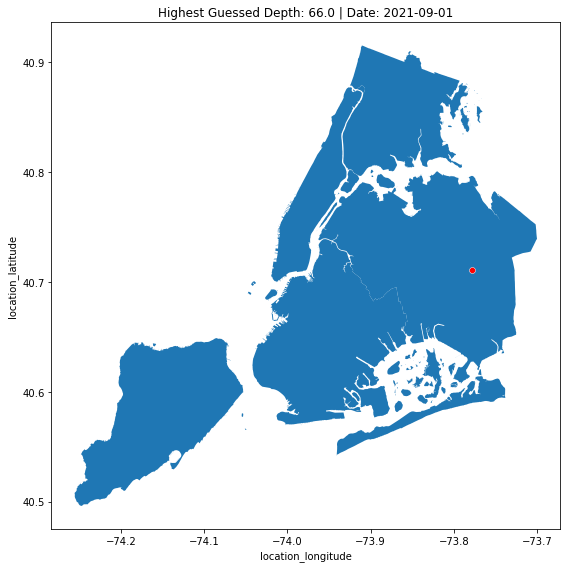

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = highest_depth_df['guessDepth'].values[0]
date = highest_depth_df['photo_date'].values[0]
plt.title('Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()
plt.savefig('figures/highest-depth.png', bbox_inches='tight', dpi=250)

https://report-images.nyc3.digitaloceanspaces.com/2023/06/21194127/20210901_221628-scaled.jpg


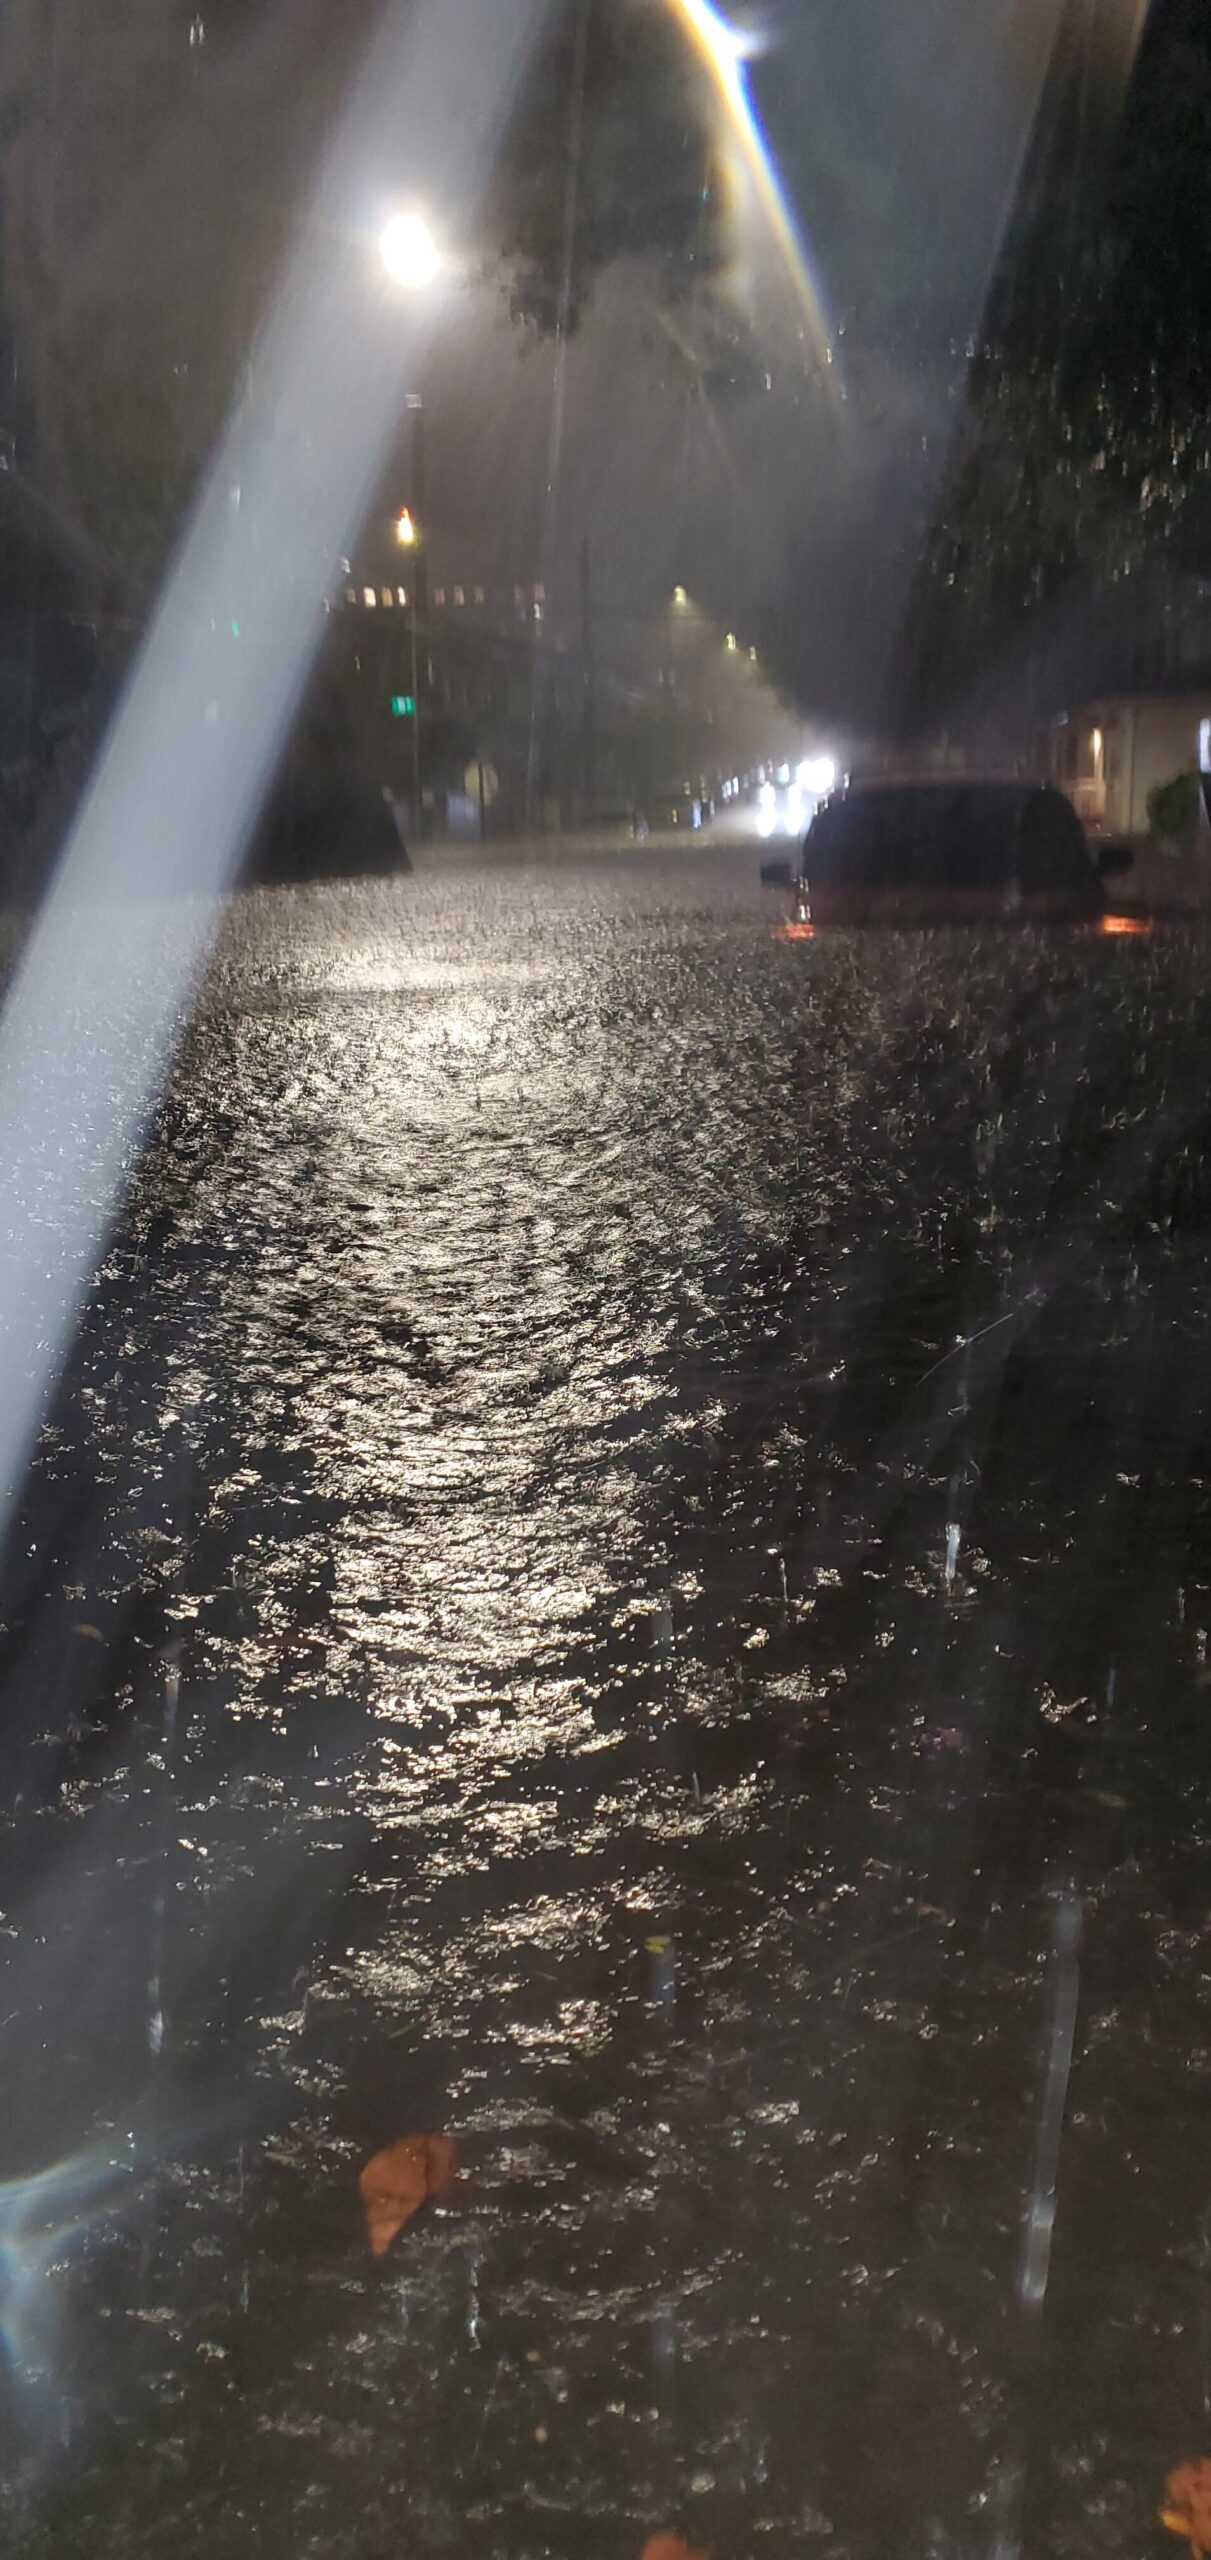

In [51]:
# plot highest depth image
url = highest_depth_df['images'].values[0]
print(url)

IPython.display.Image(url, width=300)

In [52]:
# second highest depth
second_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(2)[1:]
    .index
)

second_highest_depth_df = df.iloc[second_highest_depth]

second_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
284,120192,Flood Watch,2021-09-01,10:10 pm,NaN,https://mycoast.org/reports/120192,https://report-images.nyc3.digitaloceanspaces....,-73.777992,40.711299,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.77799 40.71130)


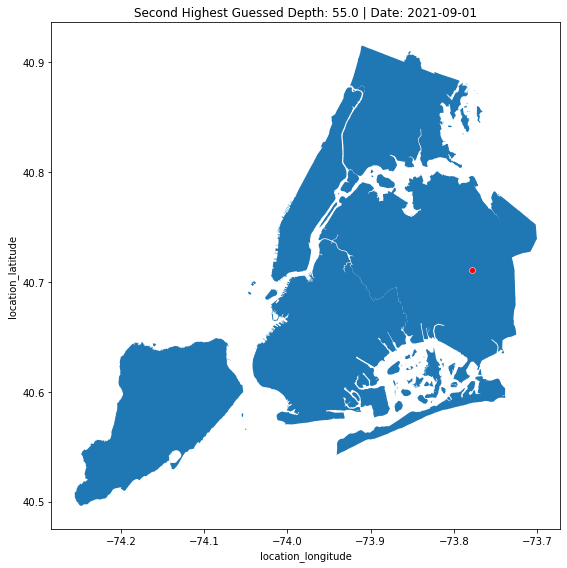

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=second_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = second_highest_depth_df['guessDepth'].values[0]
date = second_highest_depth_df['photo_date'].values[0]
plt.title('Second Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

https://report-images.nyc3.digitaloceanspaces.com/2023/06/21195159/20210901_221005-scaled.jpg


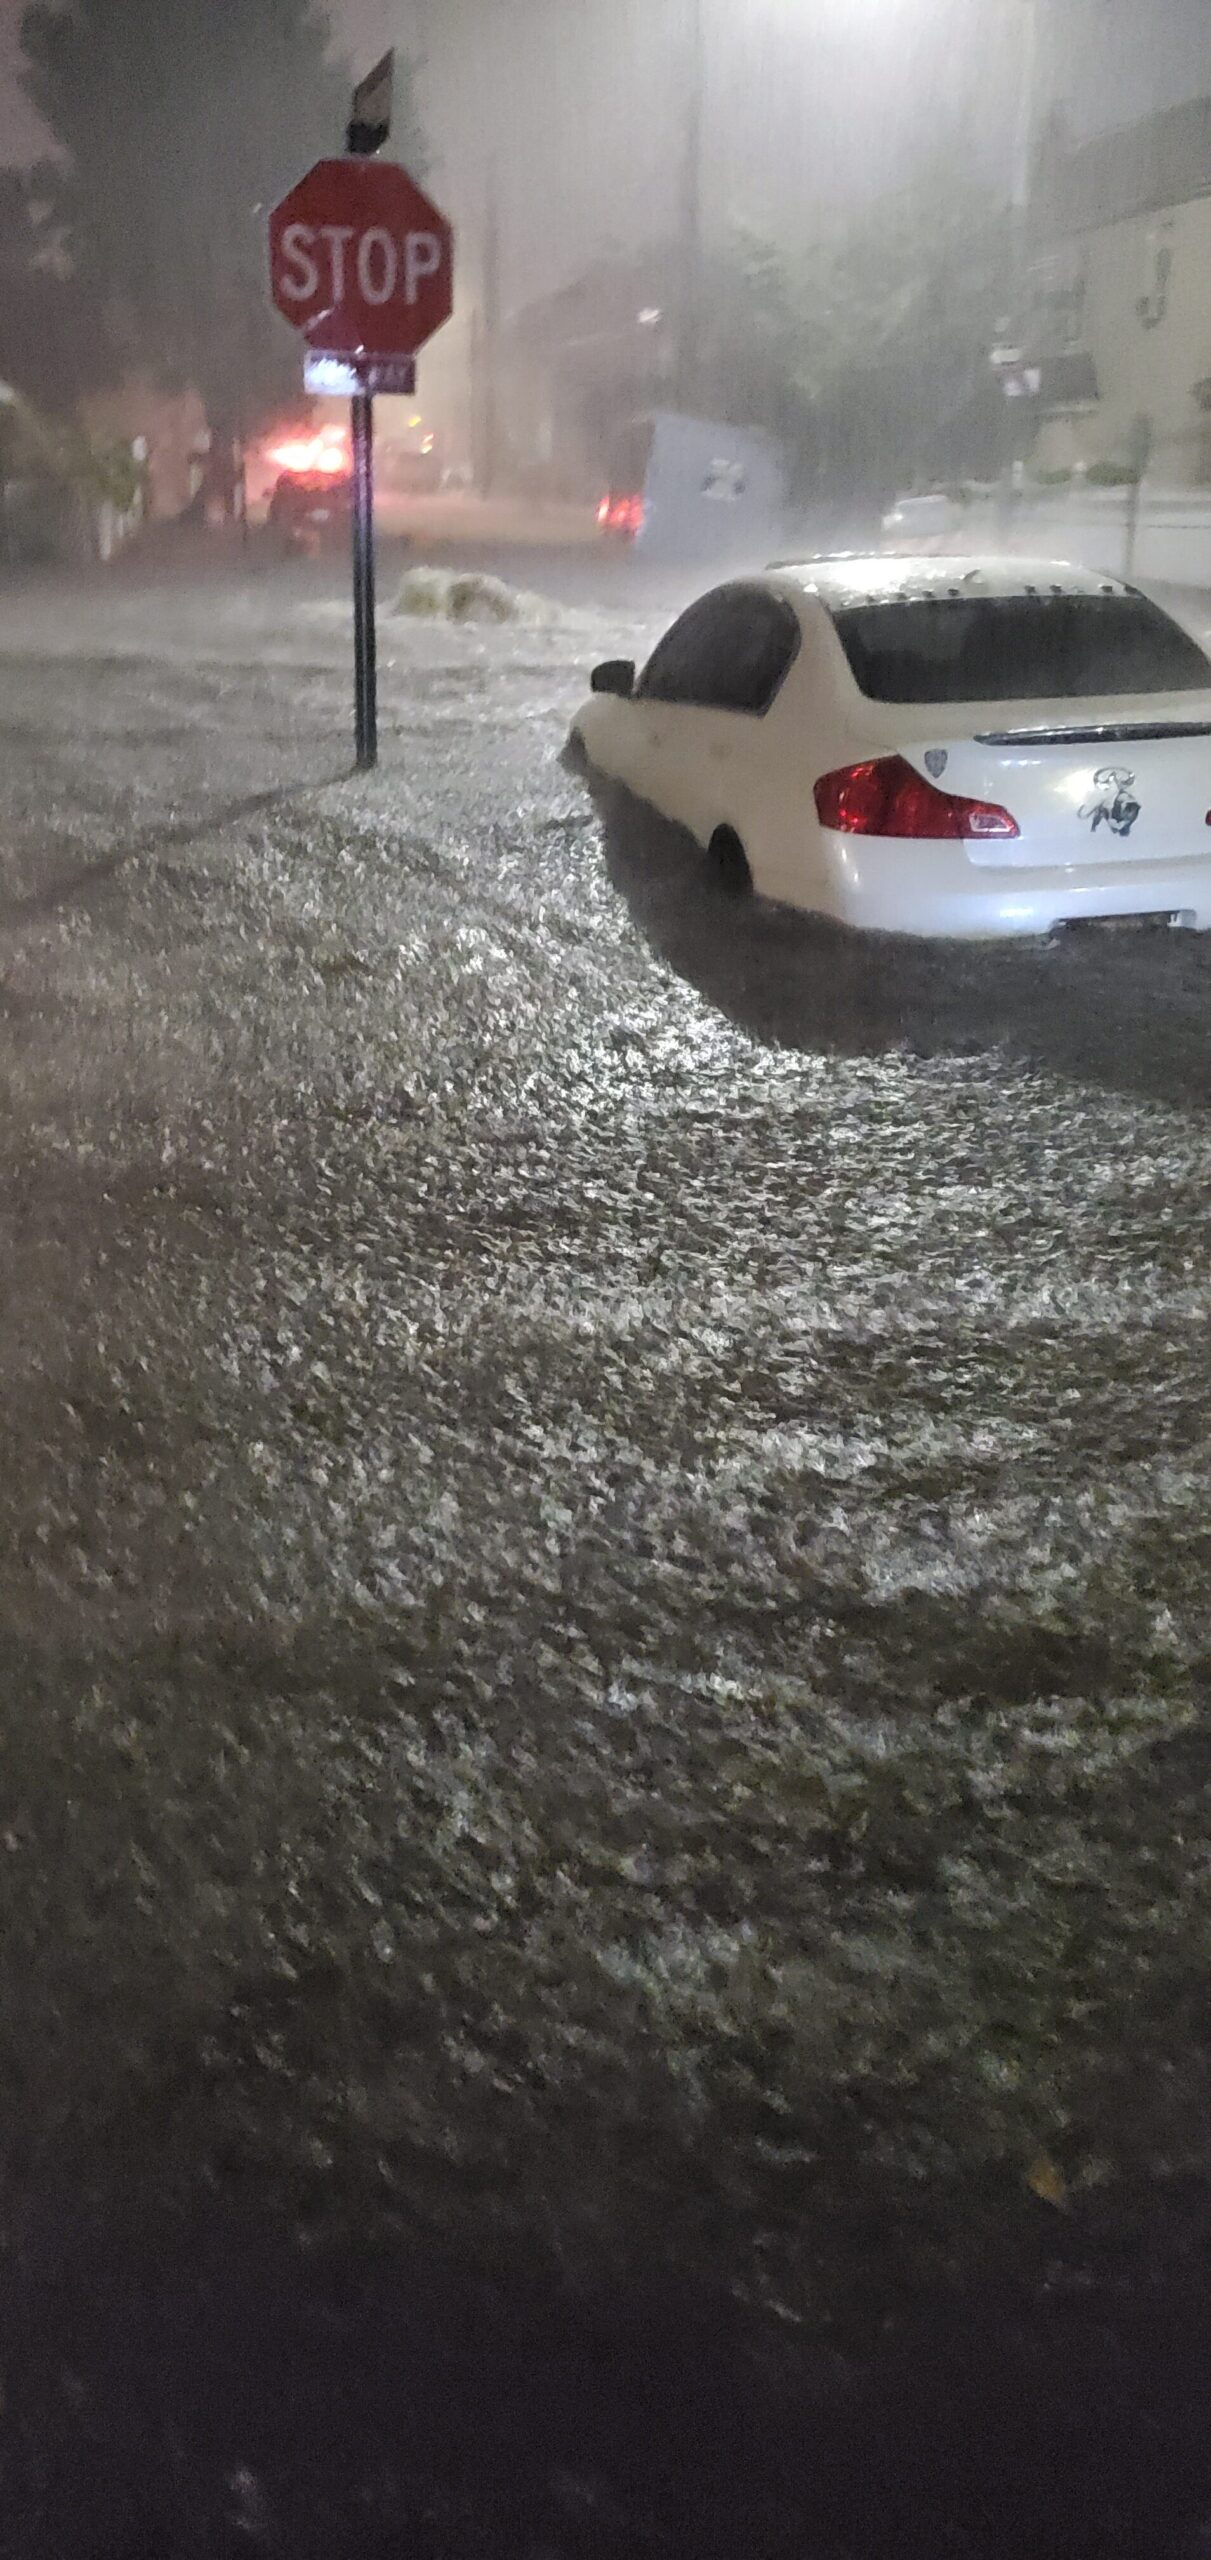

In [54]:
# plot second highest depth image
url = second_highest_depth_df['images'].values[0]
print(url)

IPython.display.Image(url, width=300)

In [55]:
# third_highest_depth
third_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(3)[2:]
    .index
)

third_highest_depth_df = df.iloc[third_highest_depth]

third_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
131,155506,Flood Watch,2023-11-08,5:09 pm,iOS 16.3.1,https://mycoast.org/reports/155506,https://report-images.nyc3.digitaloceanspaces....,-74.114953,40.553407,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.11495 40.55341)


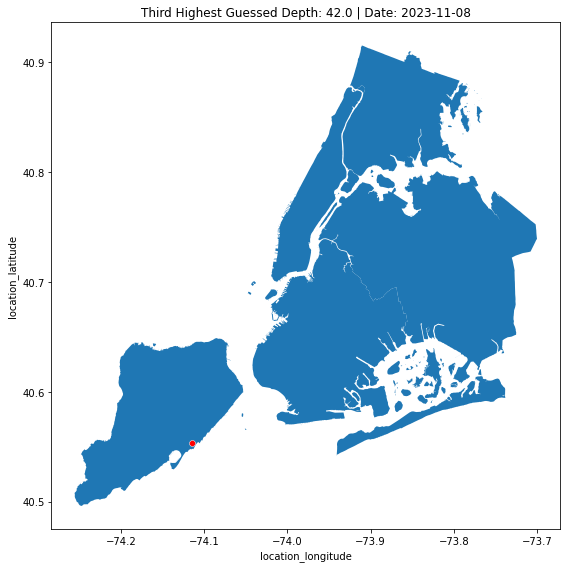

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=third_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = third_highest_depth_df['guessDepth'].values[0]
date = third_highest_depth_df['photo_date'].values[0]
plt.title('Third Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()

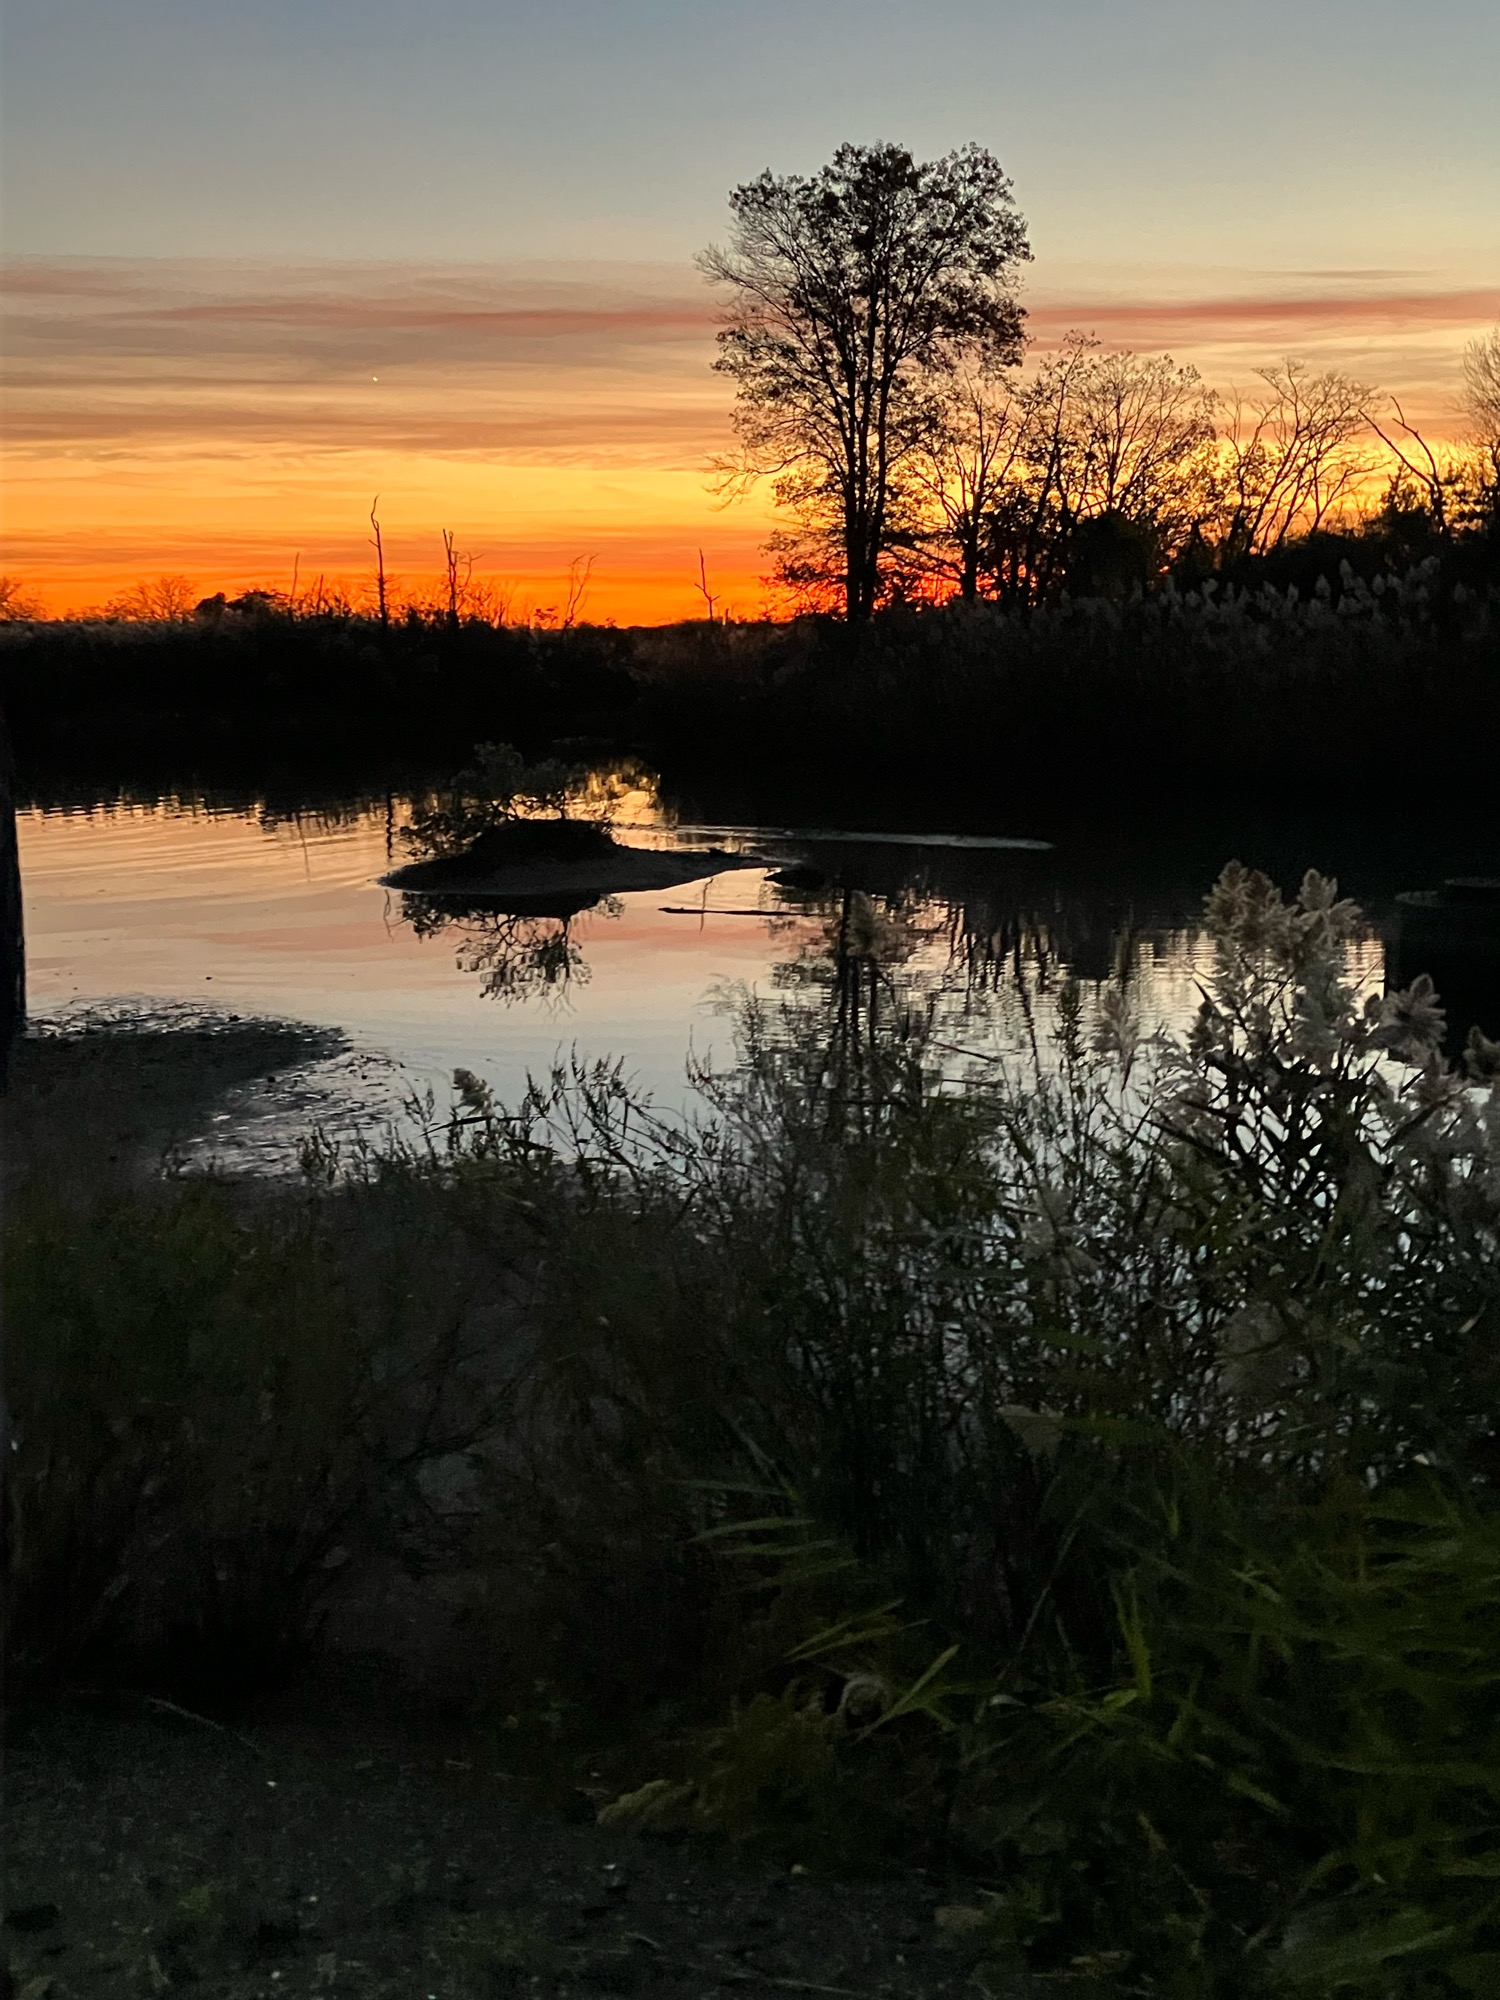

In [57]:
# plot third highest depth image
url = third_highest_depth_df['images'].values[0]

IPython.display.Image(url, width=300)

In [58]:
# fourth_highest_depth
fourth_highest_depth = (
    pd
    .to_numeric(df['guessDepth'], errors='coerce')
    .sort_values(ascending=False)
    .head(4)[3:]
    .index
)

fourth_highest_depth_df = df.iloc[fourth_highest_depth]

fourth_highest_depth_df

,ID #,reportType,photo_date,photo_time,from_device,URL,images,location_longitude,location_latitude,geo_administrative_area_level_1,...,road_damage_detail,marinas_damage_detail,beach_damage_detail,buildings_damage_detail,hazmat_damage_detail,response_damage,amazonS3_cache,place_name,structure_damage_detail,geometry
180,104360,Flood Watch,2022-12-23,07:30 am,NaN,https://mycoast.org/reports/104360,https://report-images.nyc3.digitaloceanspaces....,-73.835819,40.651086,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.83582 40.65109)


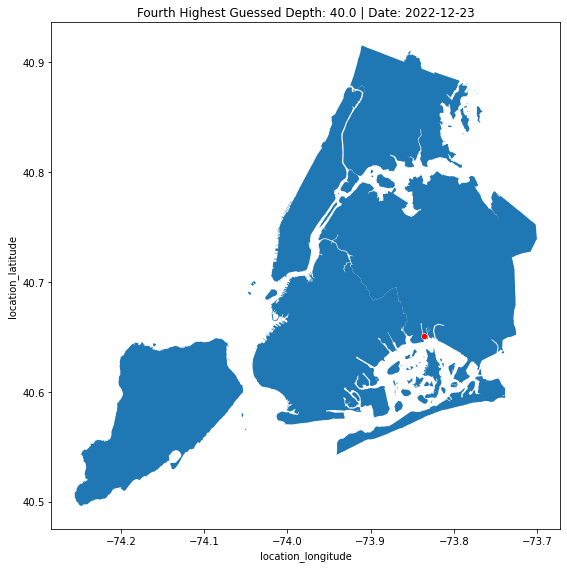

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=fourth_highest_depth_df,
    x="location_longitude",
    y="location_latitude",
    color='red',
    ax=ax,
)

nyc_boros.plot(ax=ax, zorder=0)

depth = fourth_highest_depth_df['guessDepth'].values[0]
date = fourth_highest_depth_df['photo_date'].values[0]
plt.title('Fourth Highest Guessed Depth: {} | Date: {}'.format(depth, date))

plt.tight_layout()
plt.savefig('figures/fourth-highest-depth.png', bbox_inches='tight', dpi=250)

https://report-images.nyc3.digitaloceanspaces.com/2023/01/09205934/mckee-164th-7_30-am.png


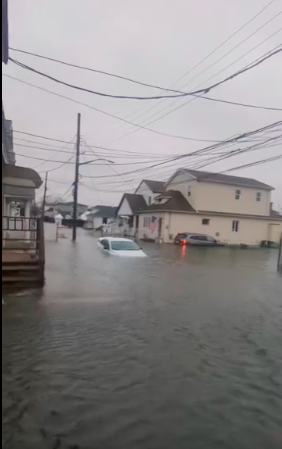

In [60]:
# plot second highest depth image
url = fourth_highest_depth_df['images'].values[0]
print(url)

IPython.display.Image(url, width=300)